## <center>Exploração de dados de cotações das Ações listadas na B3</center>

#### O Quando os valores outlires do retorno empaquetam no retorno acumulado de uma ação.

In [37]:
# Imports

# Manipulação dos dados
import numpy as np
import pandas as pd

# Cotações das Ações
import yfinance as yf

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Sistema
import sys
import os

# Ignore Warning(Avisos)
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [38]:
# Vamos adicionar o caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('../modulos/')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [39]:
# Fontes para os gráficos

font_title = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

font_ylabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font_xlabel = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

#### Ticker da Ação | Data inicial e final da coleta dos dados das cotações

In [40]:
ticker = 'ITSA4'
dt_inicial = '2014-01-01'

#### Coleta das cotações e Verificando/Tratando os valores ausentes

In [41]:
df = yf.download(f'{ticker}.SA', start=dt_inicial, threads=False, progress=False)

# Amostra dos dados
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-19,8.48,8.64,8.42,8.59,8.59,19393500.0
2022-07-20,8.58,8.59,8.44,8.46,8.46,16462200.0
2022-07-21,8.47,8.58,8.38,8.56,8.56,14112500.0
2022-07-22,8.58,8.60,8.39,8.47,8.47,12064900.0
2022-07-25,8.50,8.59,8.49,8.54,8.54,10114300.0


In [42]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2128 entries, 2014-01-02 to 2022-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2127 non-null   float64
 1   High       2127 non-null   float64
 2   Low        2127 non-null   float64
 3   Close      2127 non-null   float64
 4   Adj Close  2127 non-null   float64
 5   Volume     2127 non-null   float64
dtypes: float64(6)
memory usage: 116.4 KB


In [43]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [44]:
# Verificando alguns dados de medida central
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2.127000e+03
mean,8.909892,9.016811,8.793529,8.905045,7.324239,2.490927e+07
std,2.137680,2.150300,2.116982,2.136731,2.514278,1.272167e+07
min,4.910443,4.965177,4.886985,4.910443,3.286015,0.000000e+00
25%,7.028267,7.122488,6.935610,7.039788,4.696162,1.651738e+07
50%,9.009523,9.108225,8.885714,8.990000,7.613425,2.216834e+07
75%,10.580952,10.704761,10.476190,10.600000,9.523808,3.021750e+07
max,13.523809,13.695238,13.447619,13.666666,12.219232,1.227457e+08


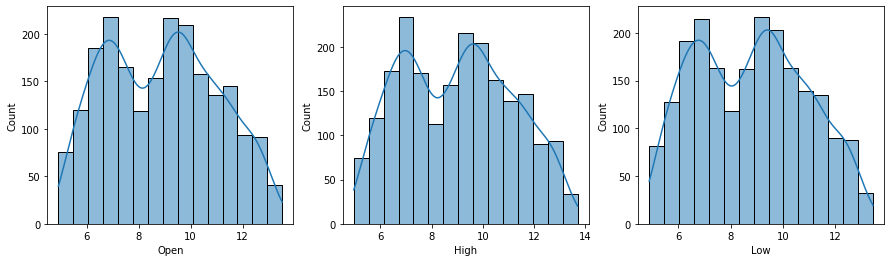

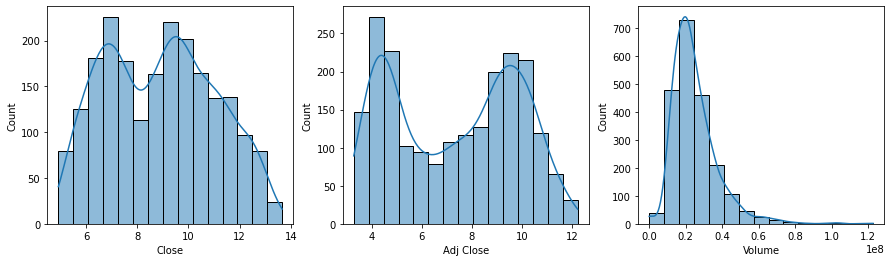

In [45]:
# Histograma das variáveis
figura1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
figura2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(df['Open'], bins=15, kde=True, ax=ax1)
sns.histplot(df['High'], bins=15, kde=True, ax=ax2)
sns.histplot(df['Low'], bins=15, kde=True, ax=ax3)
sns.histplot(df['Close'], bins=15, kde=True, ax=ax4)
sns.histplot(df['Adj Close'], bins=15, kde=True, ax=ax5)
sns.histplot(df['Volume'], bins=15, kde=True, ax=ax6)
plt.show()

In [46]:
# Vamos realizar a imputação dos dados ausentes pela mediana
df['Open'].fillna(df['Open'].median(), inplace=True)
df['High'].fillna(df['High'].median(), inplace=True)
df['Low'].fillna(df['Low'].median(), inplace=True)
df['Close'].fillna(df['Close'].median(), inplace=True)
df['Adj Close'].fillna(df['Adj Close'].median(), inplace=True)
df['Volume'].fillna(df['Volume'].median(), inplace=True)

In [47]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Criando novas variáveis (Retorno)

In [48]:
# Criando a variável de retorno
df['Retorno'] = round(df['Adj Close'].pct_change() * 100, 2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Retorno
Date,,,,,,,
2014-01-02,5.734564,5.766673,5.612552,5.638239,3.581270,15945191.0,NaN
2014-01-03,5.638239,5.696034,5.606131,5.657504,3.593507,15756456.0,0.34
2014-01-06,5.631817,5.728143,5.631817,5.696034,3.617981,16779396.0,0.68
2014-01-07,5.689613,5.747408,5.657504,5.676769,3.605743,20329554.0,-0.34
2014-01-08,5.676769,5.728143,5.644661,5.708878,3.626137,20823817.0,0.57


#### Trantando valores ausentes variável (Retorno)

In [49]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Retorno      1
dtype: int64

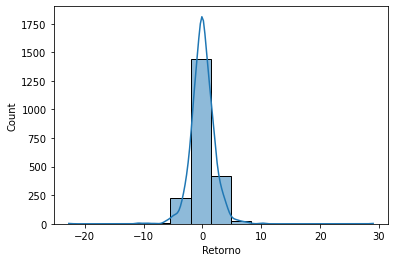

In [50]:
# Histograma da variável
sns.histplot(df['Retorno'], bins=15, kde=True)
plt.show()

In [51]:
# Vamos realizar a imputação dos dados ausentes pela média
df['Retorno'].fillna(df['Retorno'].mean(), inplace=True)

In [52]:
# Verificando se a dados ausentes
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Retorno      0
dtype: int64

#### Verificando e Substituindo (Replace) os outlires

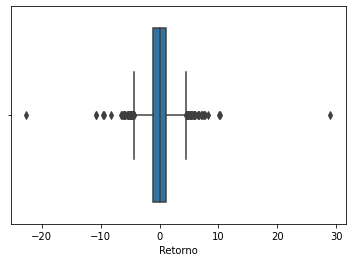

In [64]:
df_rep_outlires = df.copy() # Fazendo uma cópia do DataFrame 'original'

# Plot
sns.boxplot(df_rep_outlires['Retorno'])
plt.show()

In [54]:
trata_rep_outliers = TrataOutlier(df_rep_outlires)

lista_colunas = df_rep_outlires.select_dtypes('float64').columns.tolist()

lista_colunas

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Retorno']

In [55]:
trata_rep_outliers.getOverview(lista_colunas)

Nome de Coluna,Volume,Retorno,Open,High,Low,Close,Adj Close
Min,0.0,-22.7,4.910443,4.965177,4.886985,4.910443,3.286015
Q1,16518572.25,-1.06,7.028853,7.122879,6.93561,7.041052,4.696734
Median,22168335.0,0.0,9.009523,9.108225,8.885714,8.99,7.613425
Q3,30200102.5,1.1525,10.57619,10.704761,10.47619,10.6,9.523808
Max,122745735.0,29.02,13.523809,13.695238,13.447619,13.666666,12.219232
IQR,13681530.25,2.2125,3.547337,3.581882,3.54058,3.558949,4.827074
Lower fence,-4003723.125,-4.37875,1.707848,1.750057,1.62474,1.702629,-2.543877
Upper fence,50722397.875,4.47125,15.897195,16.077583,15.787059,15.938423,16.764418
Skew,1.877202,0.620196,0.113081,0.105217,0.118528,0.116172,-0.039566
Num_Outliers,83,77,0,0,0,0,0


In [56]:
# Replace dos outliers 
# Trocando os valores outliers pelo Q1 e Q3 respectivamente
trata_rep_outliers.replace_outliers_with_fences(lista_colunas)

In [57]:
# Visão geral dos outliers
trata_rep_outliers.getOverview(lista_colunas)

Nome de Coluna,Open,High,Low,Close,Adj Close,Volume,Retorno
Min,4.910443,4.965177,4.886985,4.910443,3.286015,0.0,-4.37875
Q1,7.028853,7.122879,6.93561,7.041052,4.696734,16518572.25,-1.06
Median,9.009523,9.108225,8.885714,8.99,7.613425,22168335.0,0.0
Q3,10.57619,10.704761,10.47619,10.6,9.523808,30200102.5,1.1525
Max,13.523809,13.695238,13.447619,13.666666,12.219232,50722397.875,4.47125
IQR,3.547337,3.581882,3.54058,3.558949,4.827074,13681530.25,2.2125
Lower fence,1.707848,1.750057,1.62474,1.702629,-2.543877,-4003723.125,-4.37875
Upper fence,15.897195,16.077583,15.787059,15.938423,16.764418,50722397.875,4.47125
Skew,0.113081,0.105217,0.118528,0.116172,-0.039566,0.735972,0.063239
Num_Outliers,0,0,0,0,0,0,0


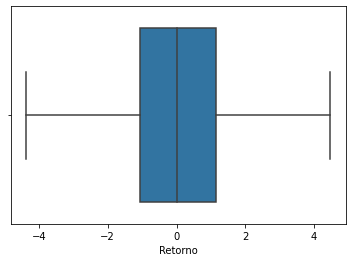

In [63]:
# Plot 
sns.boxplot(df_rep_outlires['Retorno'])
plt.show()

## Fazendo a comparação do retorno acumulado com e sem os outliers

* Os valores outlires não foram removidos e sim substituidos pelo Q1 e Q3 respectivamente

In [59]:
df_rep_outlires['Total_Retorno_Com_Outlier'] = df['Retorno'].cumsum()
df_rep_outlires['Total_Retorno_Sem_Outliers'] = df_rep_outlires['Retorno'].cumsum()
df_rep_outlires.tail()

,Open,High,Low,Close,Adj Close,Volume,Retorno,Total_Retorno_Com_Outlier,Total_Retorno_Sem_Outliers
Date,,,,,,,,,
2022-07-19,8.48,8.64,8.42,8.59,8.59,19393500.0,1.90,135.173263,127.699513
2022-07-20,8.58,8.59,8.44,8.46,8.46,16462200.0,-1.51,133.663263,126.189513
2022-07-21,8.47,8.58,8.38,8.56,8.56,14112500.0,1.18,134.843263,127.369513
2022-07-22,8.58,8.60,8.39,8.47,8.47,12064900.0,-1.05,133.793263,126.319513
2022-07-25,8.50,8.59,8.49,8.54,8.54,10114300.0,0.83,134.623263,127.149513


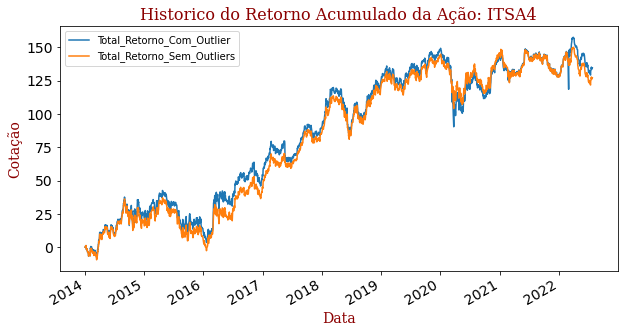

In [60]:
df_rep_outlires[['Total_Retorno_Com_Outlier','Total_Retorno_Sem_Outliers']].plot(figsize = (10, 5))
plt.title(f'Historico do Retorno Acumulado da Ação: {ticker}', fontdict=font_title)
plt.ylabel('Cotação', fontdict=font_ylabel)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontdict=font_xlabel)
plt.xticks(fontsize=14)
plt.legend()
plt.show()

#### Verificando e removendo os outlires

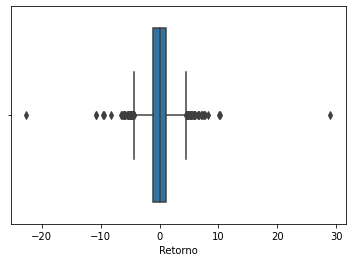

In [62]:
df_rev_outlires = df.copy() # Fazendo uma cópia do DataFrame 'original'

sns.boxplot(df_rev_outlires['Retorno'])
plt.show()

In [ ]:
# Calculando duas médias moveis
mm1 = 50
mm2 = 100

df[f'MM{mm1}'] = df['Adj Close'].rolling(mm1).mean()
df[f'MM{mm2}'] = df['Adj Close'].rolling(mm2).mean()

In [ ]:
# Visualização do comportamento da Ação ao longo do tempo
sns.set()
df[['Adj Close',f'MM{mm1}',f'MM{mm2}']].plot(figsize = (10, 5))
plt.title(f'Historico de Fechamento da Ação: {ticker}', fontdict=font_title)
plt.ylabel('Cotação', fontdict=font_ylabel)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontdict=font_xlabel)
plt.xticks(fontsize=14)

plt.show()